# Transforming Data
Data can be changed/transformed in several ways
- Changing the `names` of columns/variables
- Changing the `values` and/or `attributes (data types`) of columns 
- Creating `new` columns/variables

---
## Data Preparation

We will import a dataset from the Framingham study, which was a long term study of cardiovascular disease about subjects in Framingham, USA. In this dataset
- ~4000 subjects followed up and clinical data and chronic heart disease outcomes were examined longitudinally over > 10 years

The variables include

- `male` : 0 = female, 1 = male
- `age` : Age at the time of medical examination in years.
- `education` : 1 = Some high school, 2 = high school/GED, 3 = some college/vocational school, 4 = college
- `currentSmoker`: Current cigarette smoking at the time of examinations
- `cigsPerDay`: Number of cigarettes smoked each day
- `BPmeds`: Use of Anti-hypertensive medication at exam
- `prevalentStroke`: Prevalent Stroke 
- `prevalentHyp`: Prevalent Hypertensive
- `diabetes`: Diabetic according to criteria of first exam treated
- `totChol`: Total cholesterol (mg/dL)
- `sysBP`: Systolic Blood Pressure (mmHg)
- `diaBP`: Diastolic blood pressure (mmHg)
- `BMI`: Body Mass Index, weight (kg)/height (m)^2
- `heartRate`: Heart rate (beats/minute)
- `glucose`: Blood glucose level (mg/dL)

In [ ]:
library(tidyverse)

# import data
data <- read_csv("https://raw.githubusercontent.com/kennethban/dataset/main/framingham.csv")

head(data)

---
## Renaming columns

In some cases, we would like to rename columns for consistency/readability. 

We can do this using the `rename` verb(function)
- `rename(new_name = original_name)`

![tidy_rename.png](images/tidy_rename.png)
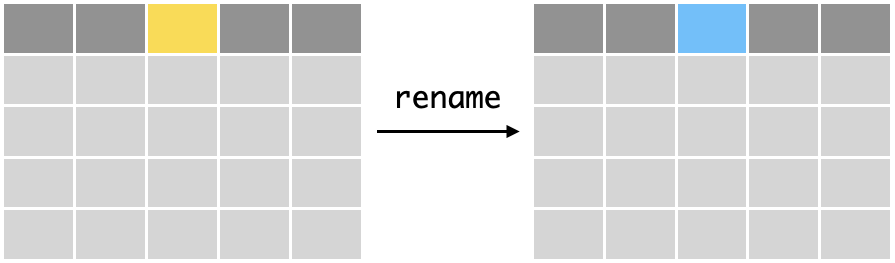

In [ ]:
# renaming male column to sex

data %>% 
rename(sex = male) %>% 
head()

Let us inspect the data again

In [ ]:
head(data)

Wait a minute, what happened?
- The original data remains the same because the change by `rename` was not saved as a variable
- To save results from pipe operations, we assign it to a variable using the assignment operator ```<-```
- We can choose to save it to a different variable, or in this case, we will overwrite the original ```data``` variable

In [ ]:
# overwrite data variable after change of name

data <- data %>% rename(sex = male)

There is no printout because it is saved into the ```data``` variable, overwriting its original content

We can inspect `data` again to confirm that the change was saved

In [ ]:
head(data)

## Changing values/attributes of a column

![tidy_mutate_existing.png](images/tidy_mutate_existing.png)

- We can change the values of a column using the ```mutate``` verb(function) in combination with operations and/or functions
  - `mutate(column1 = operation/function, column2 = operation/function,..)`
- The `mutate` function can be used to 
  - change data types
  - perform calculations
  - recode categorical variables
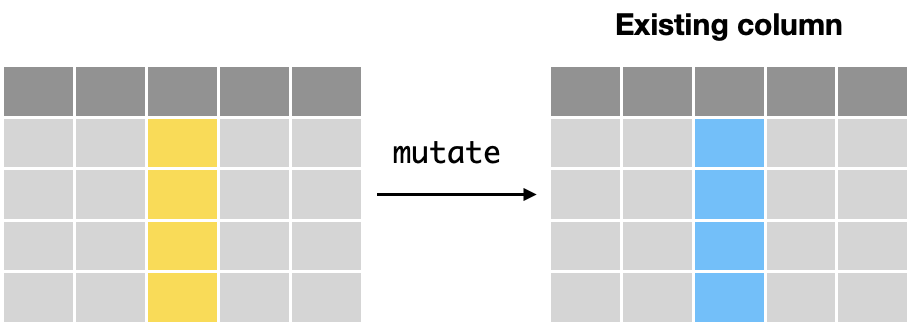

### 1. Data type

Inspecting and changing the data type of columns is an important step after importing data
- When data is imported, the data type is inferred from the values
- The inferred data type may not be what we want

We will take a look at the `data` variable that contains the data imported by the `read_csv` function

In [ ]:
head(data)

As the values in the columns are numbers, the `read_csv` function inferred that the values should be assigned a `numeric` data type (also known as `dbl` for double precision floating point)
- Some of the columns are `categorical` (e.g. male, education, currentSmoker) and will need to be converted to a `factor` type
- Some of the columns contain whole numbers (e.g. cigsPerDay, heartRate) and would more appropriately assigned an `integer` type

The data type have implications for analysis, in particular how **categories** are treated. If they are not converted to a `factor` type,  frequencies of the categories cannot be calculated during analysis

We can illustrate this by using the function `summary` that prints out summary statistics for quantitative and categorical variables

In [ ]:
summary(data)

Note that categories (eg. `sex`, `education`, `TenYearCHD`) are not reported properly as frequencies as they were assigned `numeric` data type

To do the data type conversions we can use data type coercion functions with `mutate`
- `mutate(column_name = as.numeric(column_name)`
- `mutate(column_name = as.integer(column_name)`
- `mutate(column_name = as.character(column_name)`
- `mutate(column_name = as.factor(column_name)`
- `mutate(column_name = as.logical(column_name)`

In [ ]:
# converting sex column to a factor

data <- data %>% mutate(sex = as.factor(sex))

head(data)

We can also perform multiple conversions with `mutate`

In [ ]:
# changing data type of multiple columns

data <- data %>% mutate(age = as.integer(age),
                        education = as.factor(education),
                        currentSmoker = as.factor(currentSmoker),
                        cigsPerDay = as.integer(cigsPerDay),
                        BPMeds = as.factor(BPMeds),
                        prevalentStroke = as.factor(prevalentStroke),
                        prevalentHyp = as.factor(prevalentHyp),
                        diabetes = as.factor(diabetes),
                        totChol = as.integer(totChol),
                        heartRate = as.integer(heartRate),
                        TenYearCHD = as.factor(TenYearCHD)
                        )

head(data)

We can run `summary` again to see how categorical data are treated

In [ ]:
summary(data)

### 2. Calculations

We can use `mutate` with mathematical operations and functions to perform calculations on column values

- A common use case is to convert values in a column to a different units

In [ ]:
# convert mg/dL to mmol/L then round to 1 decimal place

data <- data %>% 
        mutate(glucose = round(glucose/18, digits=1)) 

head(data)

### 3. Recoding

**Recoding one-to-one replacement**

If we have categories/levels in `factors` that we want to recode with a one-to-one replacement, we can use the `recode` function together with `mutate`
```
mutate(column_name = recode(column name, 
                            old_code1 = new_code1,
                            old_code2 = new_code2,
                            ...)
```

In [ ]:
# recoding 0/1 to F/M in sex column

data <- data %>% 
        mutate(sex = recode(sex, "0" = "F", 
                                 "1" = "M" ))

head(data)

**Recoding based on conditions**

In cases where we need to include conditions for recoding, we use the `case_when` function with `mutate`. 
- For each condition, we specify the conditional statement on the left hand side (`LHS`) and the recoded value on the right hand side (`RHS`) as `LHS ~ RHS`

```
mutate(column_name = case_when(condition1 ~ code1,
                               condition2 ~ code2,
                               ...)
```

In [ ]:
# using case_when to recode numeric values to categories in new column

data <- data %>% 
        mutate(ageCat = case_when(
                         age < 65 ~ "adult",
                         age >= 65 ~ "senior"))

data %>% sample_n(10)

Note that by default, `case_when` treats labels as `character` data types, hence the `ageCat` column type reflects this
- If we run `summary` on the data, we can see that the frequencies of the categories are not reported

In [ ]:
summary(data)

We would need to explicitly `mutate` the recoded column as a `factor` after recoding to a categorial label
- After doing this, the `summary` function reports the frequencies of the categories correctly

In [ ]:
data <- data %>% mutate(ageCat = as.factor(ageCat))

summary(data)

Note that the factors are listed in alphabetical order. If this is not what we want, we can use the `fct_relevel` function with `mutate` to specify the order of the factors
```
mutate(column_name = fct_relevel(column_name, level1, level2,..))
```

In [ ]:
# overriding the alphabetical ordering of factor levels (F,M to M,F)

data <- data %>% 
        mutate(sex = fct_relevel(sex, "M","F"))

summary(data)

Now we see that the levels for `sex` are listed as `M`,`F` instead of the default alphabetical order `F`, `M`

#### Recommendation for recoding to factor variables

- Check that the recoded column is a `factor` data type and not `character`
- Convert to `factor` if necessary
- Perform `fct_relevel` if you wish to change the order

These steps can be chained together with pipes
```
mutate(column_name = case_when(
                         condition1 ~ "label1",
                         condition2 ~ "label2",
                         ...)) %>%
mutate(column_name = as.factor(column_name)) %>%
mutate(column_name = fct_relevel(column_name, "label1","label2",..))                         
```

## Creating a new column from different variables

In some cases, we would like to create a new column that incorporates a calculation using values from other columns. 

An example would be the calculation of `BMI` from `weight` and `height`
- `mutate(BMI = weight/height^2)`

![tidy_mutate_new.png](images/tidy_mutate_new.png)
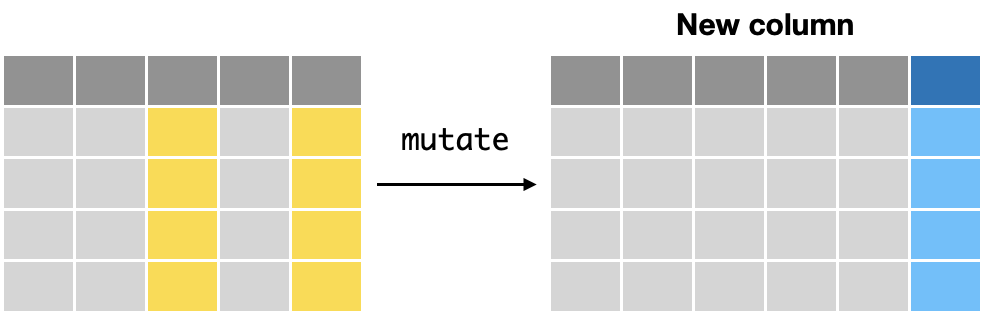

In [ ]:
# create new column called pulsePre
# calculate difference between systolic and diastolic BP

data <- data %>% 
        mutate(pulsePres = sysBP - diaBP)

head(data)

---
## Summarizing data

![tidy_summarize.png](images/tidy_summarize.png)

The ```summarize``` function can be applied to a column, using any function that can return a summary value from a vector

```
summarize(summary_name1 = function1(column_to_summarize),
          summary_name2 = function2(column_to_summarize),
          ...)
)
```

The `summarize` function returns a tibble with the summary names as the column names
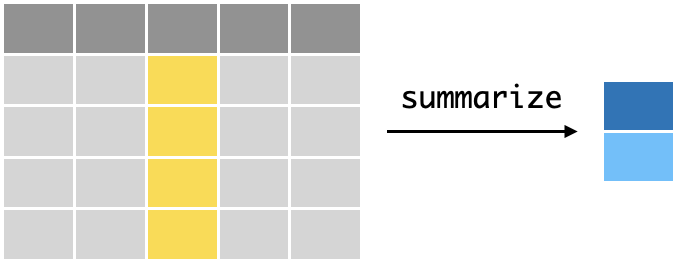

In [ ]:
# summarize using functions that take a vector from a column and return a value

data %>% summarise(n = n(),               # number of rows/cases
                   min_age = min(age),    # minimum
                   max_age = max(age),    # maximum
                   mean_age = mean(age))  # average

## Data can be grouped before summarizing

![tidy_summarize_group.png](images/tidy_summarize_group.png)

We use the ```group_by``` function to specify how the data should be grouped by a category before ```summarize``` is applied to each group
- This is useful for showing summary statistics for each group
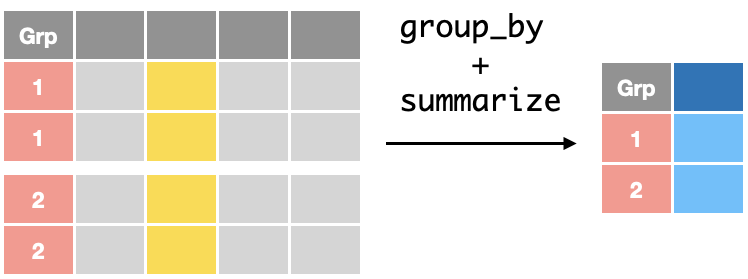

In [ ]:
# summary can be be grouped by any column that is categorical

data %>% 
group_by(ageCat) %>%
summarise(mean_age = mean(age)) # the mean age is calculate for each ageCat category

In [ ]:
# multiple summary variables can be included using functions that accept vectors

data %>% 
group_by(ageCat) %>%
summarise(num = n(),             # number of rows/cases
          mean_age = mean(age))

In [ ]:
# data can be grouped by multiple columns

data %>% 
group_by(ageCat, diabetes) %>%
summarise(num = n(),
          mean_age = mean(age), 
          median_age = median(age))

In [ ]:
# factors can be re-ordered to change the output as desired 

data %>% 
mutate(diabetes = fct_relevel(diabetes, c("1","0"))) %>%
group_by(ageCat, diabetes) %>%
summarise(num = n(),
          mean_age = mean(age), 
          median_age = median(age))

--- 
## Exercise - Transforming Data

We will use the same Framingham heart study dataset

In [ ]:
library(tidyverse)

# import data
data <- read_csv("https://raw.githubusercontent.com/kennethban/dataset/main/framingham.csv")

# A recap of what we did
data <- data %>%
        rename(sex = male) %>%                             # renaming
        mutate(glucose = round(glucose/18, digits=1)) %>%  # calculating
        mutate(age = as.integer(age),                      # change data type
               sex = as.factor(sex),
               education = as.factor(education),
               currentSmoker = as.factor(currentSmoker),
               cigsPerDay = as.integer(cigsPerDay),
               BPMeds = as.factor(BPMeds),
               prevalentStroke = as.factor(prevalentStroke),
               prevalentHyp = as.factor(prevalentHyp),
               diabetes = as.factor(diabetes),
               totChol = as.integer(totChol),
               heartRate = as.integer(heartRate),
               TenYearCHD = as.factor(TenYearCHD)
               ) %>%
         mutate(sex = recode(sex, "0" = "F",         # recoding
                                  "1" = "M" )) %>%
         mutate(ageCat = case_when(                  # recoding new column with conditions
                         age < 65 ~ "adult",
                         age >= 65 ~ "senior")) %>%
         mutate(ageCat = as.factor(ageCat)) %>%      # change data type
         mutate(sex = fct_relevel(sex, "M","F")) %>% # order of levels
         mutate(pulsePres = sysBP - diaBP)           # create new column from other variables

head(data)

### Part 1

Recode the ```BMI``` to these categories as ```weightCat```
- less than 18 : underweight
- greater/equal to 18 and lesser/equal to 25: normal
- greater than 25 and lesser/equal to 30: overweight
- greater than 30: obese

Convert them to factors and store them in ```data2```

In [ ]:
# start here

In [ ]:
# solution

data2 <- data %>% 
         mutate(weightCat = case_when(BMI < 18 ~ "underweight",
                                      BMI >= 18 & BMI <= 25 ~ "normal",
                                      BMI > 25 & BMI <= 30 ~ "overweight",
                                      BMI > 30 ~ "obese"
                                       )) %>%
        mutate(weightCat = as.factor(weightCat))


In [ ]:
# check here

head(data2)

### Part 2

Using ```data2``` convert totChol to mmol/L (rounded to 1 digit) and update ```data2```

In [ ]:
# start here

In [ ]:
# solution

data2 <- data2 %>% 
         mutate(totChol = round(totChol/38, digits = 1))

In [ ]:
# check here

head(data2)

### Part 3

Using ```data2```
- Remove rows with NA values in ```weightCat``` and ```totChol``` 
- Summarize the number of patients and the mean ```totChol``` levels by ```weightCat```

In [ ]:
# start here

In [ ]:
# solution

data2 %>% 
drop_na(weightCat, totChol) %>%
group_by(weightCat) %>%
summarize(n = n(), 
          mean_chol = mean(totChol))

### Part 4

Using ```data2```
- Change the order of the weightCat to correspond to the increase in BMI, 
- Remove rows with NA values in ```weightCat```, ```glucose```,  ```totChol```
- Summarize by weightCat
  - number of patients
  - mean glucose
  - mean totChol

In [ ]:
# start here

In [ ]:
# solution

data2 %>% 
mutate(weightCat = fct_relevel(weightCat, 
                               "underweight",
                               "normal",
                               "overweight",
                               "obese")) %>%
drop_na(weightCat, glucose, totChol) %>%
group_by(weightCat) %>%
summarize(n = n(), 
        mean_glucose = mean(glucose),
        mean_chol = mean(totChol))